# Imbalanced datasets: classifier is biased towards the majority class


###Up-sample Minority Class/Down-sample Majority Class
###Penalize Algorithms (Cost-Sensitive Training)
###Try tree-based algorithms
###Optimize classification threshold
###Use balanced accuracy (or F1) to avoid false conclusions


Counter({0: 9900, 1: 100})


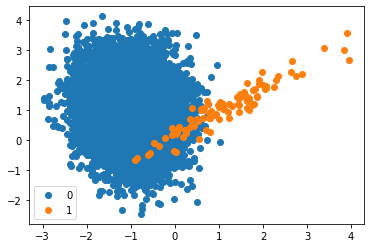

In [1]:
# Generate and plot a synthetic imbalanced classification dataset
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from numpy import where
# define dataset
X, y = make_classification(n_samples=10000, n_features=2, n_redundant=0,
	n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=2)
# summarize class distribution
counter = Counter(y)
print(counter)
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

##The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

In [ ]:
# grid search class weights with logistic regression for imbalance classification
from numpy import mean
from sklearn.datasets import make_classification
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier(n_estimators=20)

model = rf 

# define grid
balance = [{0:100,1:1}, {0:10,1:1}, {0:1,1:1}, {0:1,1:10}, {0:1,1:100}, {0:1,1:1000}]
param_grid = dict(class_weight=balance)
# define evaluation procedure
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid search
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='accuracy')
grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=cv, scoring='balanced_accuracy')
# execute the grid search
grid_result = grid.fit(X, y)
# report the best configuration
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
# report all configurations
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.844545 using {'class_weight': {0: 1, 1: 10}}
0.827912 (0.087164) with: {'class_weight': {0: 100, 1: 1}}
0.836145 (0.082515) with: {'class_weight': {0: 10, 1: 1}}
0.834461 (0.084750) with: {'class_weight': {0: 1, 1: 1}}
0.844545 (0.076707) with: {'class_weight': {0: 1, 1: 10}}
0.837879 (0.069079) with: {'class_weight': {0: 1, 1: 100}}
0.826380 (0.087259) with: {'class_weight': {0: 1, 1: 1000}}


# Class weighted logistic loss

w0 and w1 weightings can be adjusted based on the importance of each class

minimize the loss for all samples:

$-(w0 * log(yhat_i) * y_i + w1 * log(1 – yhat_i) * (1 – y_i))$

instead of 

$-(log(yhat_i) * y_i + log(1 – yhat_i) * (1 – y_i))$

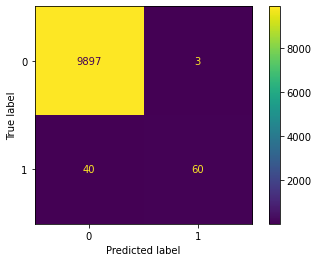

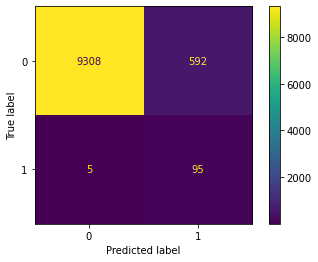

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
clf = LogisticRegression().fit(X, y)
clf_balanced = LogisticRegression(class_weight = {0: 1, 1: 100}).fit(X, y)

#clf = DecisionTreeClassifier().fit(X, y)
#clf_balanced = DecisionTreeClassifier(class_weight = {0: 1, 1: 100}).fit(X, y)

#clf = RandomForestClassifier(n_estimators=20).fit(X, y)
#clf_balanced = RandomForestClassifier(n_estimators=10,class_weight = {0: 1, 1: 100}).fit(X, y)

predictions = clf.predict(X)
cm = confusion_matrix(y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
disp.plot()

predictions = clf_balanced.predict(X)
cm = confusion_matrix(y, predictions, labels=clf_balanced.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_balanced.classes_)
disp.plot()

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

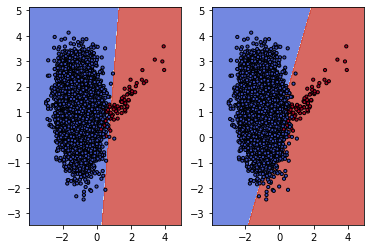

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

clf = LogisticRegression().fit(X, y)
clf_balanced = LogisticRegression(class_weight = {0: 1, 1: 100}).fit(X, y)

#clf = DecisionTreeClassifier().fit(X, y)
#clf_balanced = DecisionTreeClassifier(class_weight = {0: 1, 1: 100}).fit(X, y)

#clf = RandomForestClassifier(n_estimators=50).fit(X, y)
#clf_balanced = RandomForestClassifier(n_estimators=50,class_weight = {0: 1, 1: 100}).fit(X, y)

fig, (ax1, ax2) = plt.subplots(1, 2)
# title for the plots
title = ('Decision surface of logistic regression')
# Set-up grid for plotting.
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)
plot_contours(ax1, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plot_contours(ax2, clf_balanced, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax1.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
ax2.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=10, edgecolors='k')
plt.show()

#Separate decision making from inference: shift the decision threshold (operating point)

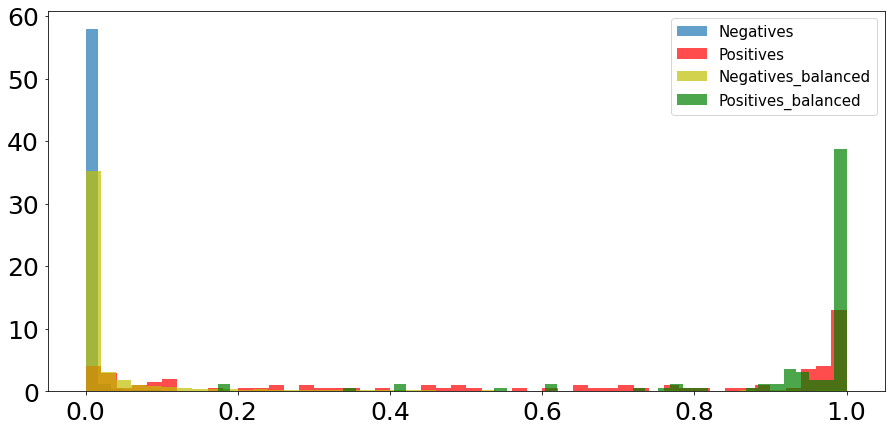

In [ ]:
prediction=clf.predict_proba(X)[:,1]
prediction_balanced=clf_balanced.predict_proba(X)[:,1]

plt.figure(figsize=(15,7))
plt.hist(prediction[y==0], bins=50, label='Negatives', alpha=0.7,density=True)
plt.hist(prediction[y==1], bins=50, label='Positives', alpha=0.7, color='r',density=True)

plt.hist(prediction_balanced[y==0], bins=50, label='Negatives_balanced', alpha=0.7,color='y',density=True)
plt.hist(prediction_balanced[y==1], bins=50, label='Positives_balanced', alpha=0.7, color='g',density=True)

plt.legend(fontsize=15)
plt.tick_params(axis='both', labelsize=25, pad=5)
plt.show() 

In [ ]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score
for th in [0.01,0.1,0.5,0.99]:
  print("%.2f" % th , '\t' , "%.2f" % accuracy_score(y, prediction>th) , '\t' , "%.2f" % balanced_accuracy_score(y, prediction>th))

0.01 	 0.94 	 0.94
0.10 	 0.99 	 0.90
0.50 	 1.00 	 0.80
0.99 	 0.99 	 0.60
